In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin, lfilter


In [2]:
# Specify the path to your .wav file
file_path = "sample.wav"  
output_path = "noisy_sample.wav"
filtered_file_path = "filtered.wav"

In [3]:
# Load the .wav file
sample_rate, audio_data = wavfile.read(file_path)
# Check if the audio is stereo or mono
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]  # Use only the first channel if stereo
# Normalize the audio signal
audio_data = audio_data / np.max(np.abs(audio_data))
# Time vector for plotting
duration = len(audio_data) / sample_rate
time = np.linspace(0., duration, len(audio_data))

In [5]:
print(len(audio_data))

262278


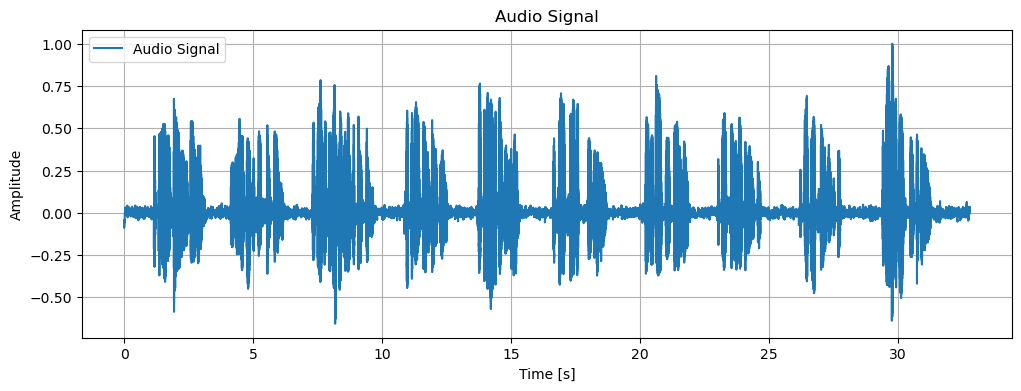

In [6]:
# Plot the audio signal
plt.figure(figsize=(12, 4))
plt.plot(time, audio_data, label="Audio Signal")
plt.title("Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [7]:
# Perform FFT
fft_spectrum = np.fft.fft(audio_data)
fft_freq = np.fft.fftfreq(len(audio_data), 1 / sample_rate)

# Only plot the positive frequencies
positive_freqs = fft_freq[:len(fft_freq) // 2]
positive_spectrum = np.abs(fft_spectrum[:len(fft_spectrum) // 2])



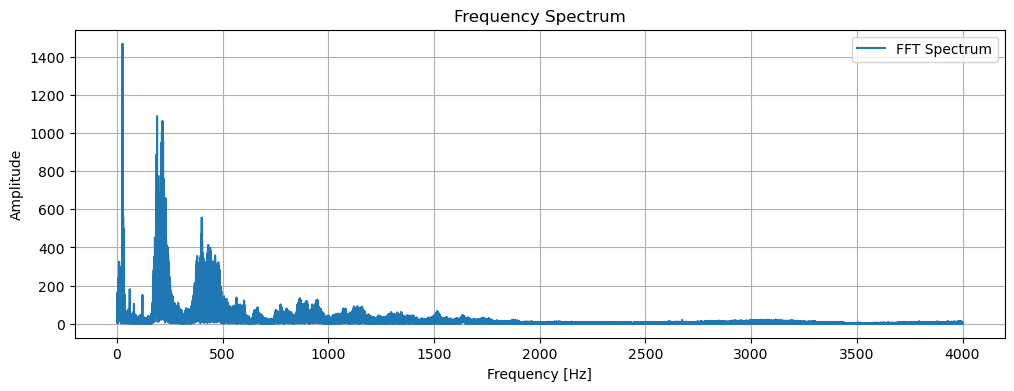

In [8]:
# Plot the FFT spectrum
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs, positive_spectrum, label="FFT Spectrum")
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [9]:
noise_frequency = 2000 # 2 Khz
noise = 0.5 * np.sin(2 * np.pi * noise_frequency * time)
noisy_signal = audio_data + noise

# Normalize the noisy signal to prevent clipping
noisy_signal = noisy_signal / np.max(np.abs(noisy_signal))

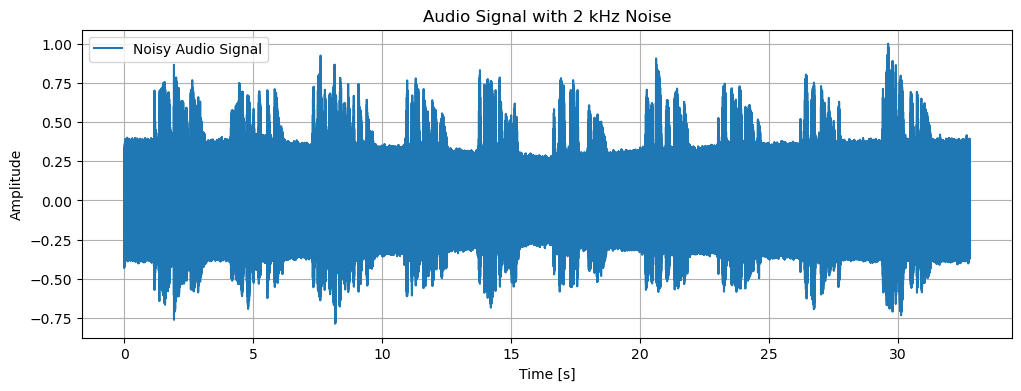

In [10]:
# Plot the noisy audio signal
plt.figure(figsize=(12, 4))
plt.plot(time, noisy_signal, label="Noisy Audio Signal")
plt.title("Audio Signal with 2 kHz Noise")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


In [11]:
# Perform FFT on the noisy signal
fft_spectrum_noisy = np.fft.fft(noisy_signal)
fft_freq_noisy = np.fft.fftfreq(len(noisy_signal), 1 / sample_rate)

# Only plot the positive frequencies
positive_freqs_noisy = fft_freq_noisy[:len(fft_freq_noisy) // 2]
positive_spectrum_noisy = np.abs(fft_spectrum_noisy[:len(fft_spectrum_noisy) // 2])


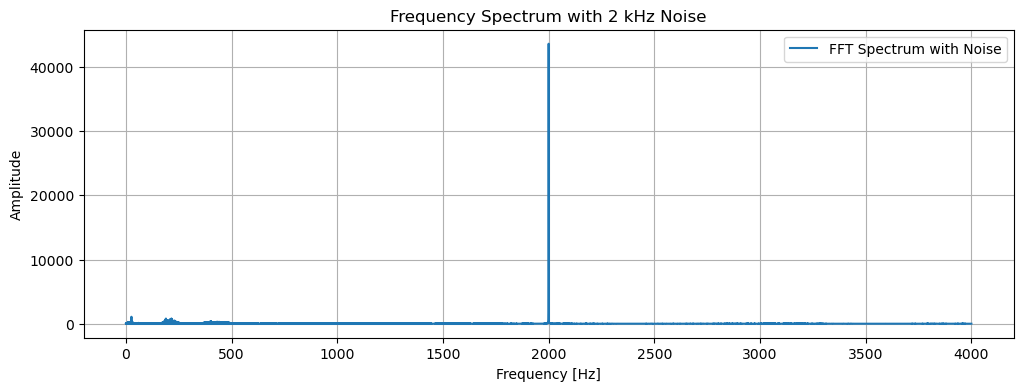

In [12]:
# Plot the FFT spectrum of the noisy signal
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs_noisy, positive_spectrum_noisy, label="FFT Spectrum with Noise")
plt.title("Frequency Spectrum with 2 kHz Noise")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [13]:
# Save the noisy signal to a new .wav file
wavfile.write(output_path, sample_rate, (noisy_signal * 32767).astype(np.int16))

print(f"Noisy audio saved to: {output_path}")

Noisy audio saved to: noisy_sample.wav


In [14]:
# FIR filter design parameters
num_taps = 101  # Number of filter taps
cutoff_freq = 1500  # Cutoff frequency just below 2 kHz (in Hz)
nyquist_rate = sample_rate / 2  # Nyquist frequency

In [15]:
# Design a low-pass FIR filter
fir_coefficients = firwin(num_taps, cutoff_freq / nyquist_rate, pass_zero='lowpass')
# Apply the FIR filter to the noisy signal
filtered_signal = lfilter(fir_coefficients, 1.0, noisy_signal)
# Normalize the filtered signal
filtered_signal = filtered_signal / np.max(np.abs(filtered_signal))



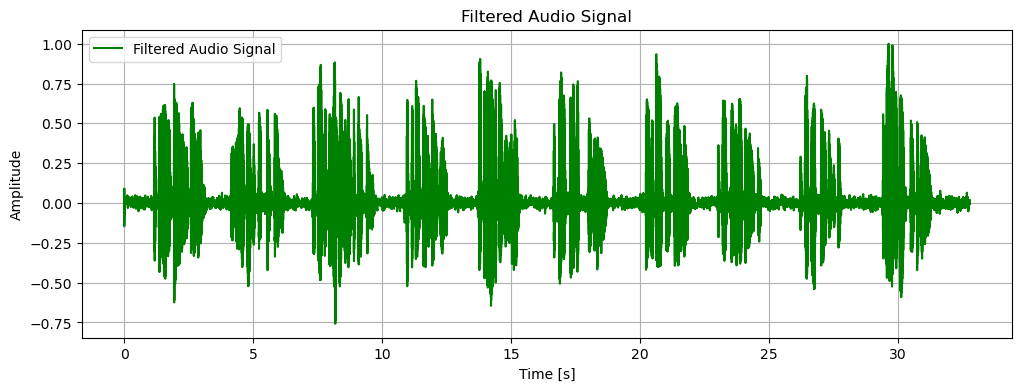

In [16]:
# Plot the filtered audio signal
plt.figure(figsize=(12, 4))
plt.plot(time, filtered_signal, label="Filtered Audio Signal", color='green')
plt.title("Filtered Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Perform FFT on the filtered signal
fft_spectrum_filtered = np.fft.fft(filtered_signal)
fft_freq_filtered = np.fft.fftfreq(len(filtered_signal), 1 / sample_rate)

# Only plot the positive frequencies
positive_freqs_filtered = fft_freq_filtered[:len(fft_freq_filtered) // 2]
positive_spectrum_filtered = np.abs(fft_spectrum_filtered[:len(fft_spectrum_filtered) // 2])


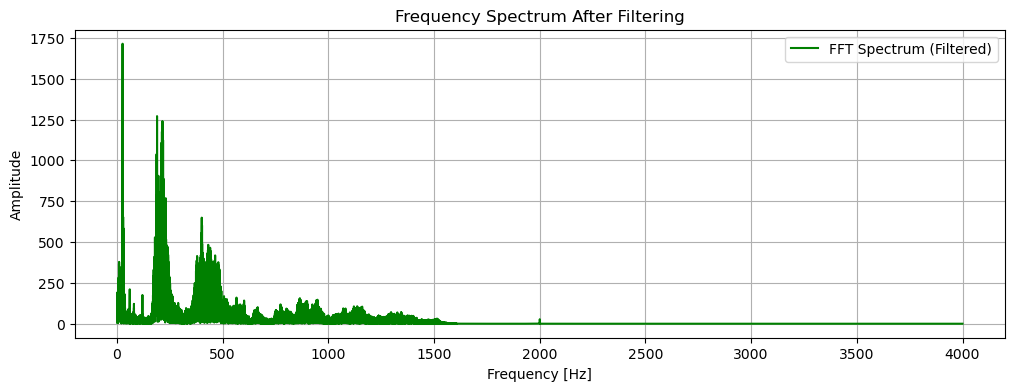

In [18]:
# Plot the FFT spectrum of the filtered signal
plt.figure(figsize=(12, 4))
plt.plot(positive_freqs_filtered, positive_spectrum_filtered, label="FFT Spectrum (Filtered)", color='green')
plt.title("Frequency Spectrum After Filtering")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


In [19]:
# Save the filtered signal to a new .wav file
wavfile.write(filtered_file_path, sample_rate, (filtered_signal * 32767).astype(np.int16))

print(f"Filtered audio saved to: {filtered_file_path}")

Filtered audio saved to: filtered.wav
